In [2]:
import matplotlib.pyplot as plt
import torch
from rbi.utils.fisher_info import score_function

from tueplots import axes, bundles
from rbi.utils.autograd_tools import batch_jacobian

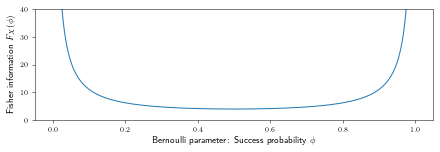

In [5]:
with plt.rc_context({**bundles.aistats2022(family="serif"), **axes.lines()}):
    fig = plt.figure(figsize=(6,2))
    x = torch.linspace(0.00001,1, 1000)
    plt.plot(x, 1/(x*(1-x)))
    plt.ylim(0,40)
    plt.ylabel("Fisher information $F_X(\phi)$")
    plt.xlabel(r"Bernoulli parameter: Success probability $\phi$")
    fig.savefig("../assets/images/bernoulli_fisher_info.png", dpi=200)

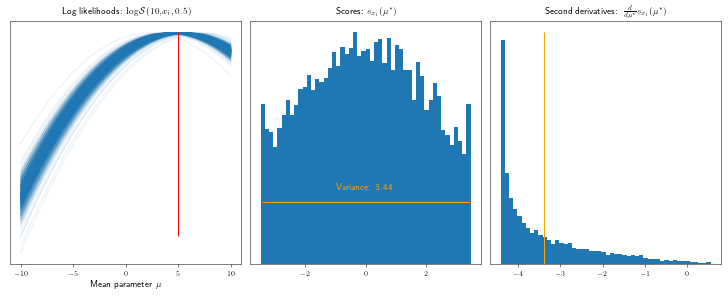

In [44]:
mean = torch.tensor([5.])
scale = 0.5
base = torch.distributions.StudentT(10., mean, scale)
t = torch.distributions.AffineTransform(0,1)
p = torch.distributions.TransformedDistribution(base, t)

def generator(x):
    base = torch.distributions.StudentT(10., t.inv(x), scale)
    q = torch.distributions.TransformedDistribution(base, t)
    return q

x = torch.linspace(-10,10, 400)
X = p.sample((10000, ))

means_diff = mean.repeat(10000,1).clone().requires_grad_(True)
scores = torch.autograd.grad(generator(means_diff).log_prob(X).sum(), means_diff, create_graph=True)[0]
hessian = torch.autograd.grad(scores.sum(), means_diff)[0]


import matplotlib.ticker as ticker
with plt.rc_context({**bundles.aistats2022(family="serif"), **axes.lines()}):
    
    fig, axs = plt.subplots(1,3, figsize=(10, 4))
    for x_i in X[:500]:
        base = torch.distributions.Normal(t.inv(x_i), 1.)
        q = torch.distributions.TransformedDistribution(base, t)
        axs[0].plot(x, q.log_prob(x).flatten(), color="C0", alpha=0.1)
    axs[0].vlines(5, -140, 0, color="red")
    axs[0].set_xlabel("Mean parameter $\mu$")
    axs[0].set_title(r"Log likelihoods: $\log \mathcal{S}(10, x_i, 0.5)$")
    axs[1].set_title(r"Scores: $s_{x_i}(\mu^*)$")
    axs[2].set_title(r"Second derivatives: $\frac{d}{d\mu^*}s_{x_i}(\mu^*)$")
    _ = axs[1].hist(scores.detach().numpy(), bins=50, density=True)
    _ = axs[1].hlines(0.05, -scores.var().detach(), scores.var().detach(), color="orange")
    axs[1].text(-1, 0.06, f"Variance: {float(scores.var().detach()):.2f}", color="orange", fontweight ="bold")
    axs[1].yaxis.set_major_locator(ticker.NullLocator())
    _ = axs[2].hist(hessian.detach().numpy(), bins=50, density=True)
    _ = axs[2].vlines(hessian.mean().detach(), 0, 2.2, color="orange")
    axs[2].yaxis.set_major_locator(ticker.NullLocator())
    axs[0].yaxis.set_major_locator(ticker.NullLocator())
    fig.savefig("../assets/student_t.png", dpi=200)

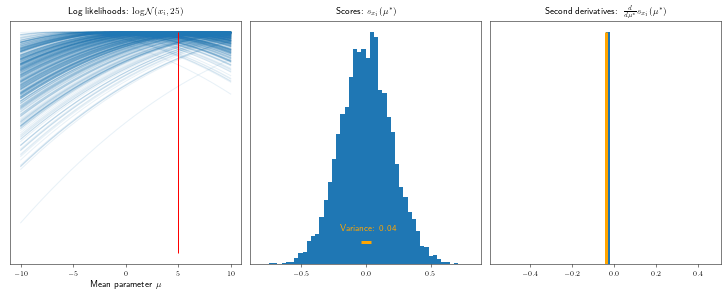

In [49]:
mean = torch.tensor([5.])
scale = 5
base = torch.distributions.Normal(mean, scale)
t = torch.distributions.AffineTransform(0,1)
p = torch.distributions.TransformedDistribution(base, t)

def generator(x):
    base = torch.distributions.Normal(t.inv(x), scale)
    q = torch.distributions.TransformedDistribution(base, t)
    return q

x = torch.linspace(-10,10, 400)
X = p.sample((10000, ))

means_diff = mean.repeat(10000,1).clone().requires_grad_(True)
scores = torch.autograd.grad(generator(means_diff).log_prob(X).sum(), means_diff, create_graph=True)[0]
hessian = torch.autograd.grad(scores.sum(), means_diff)[0]


import matplotlib.ticker as ticker
with plt.rc_context({**bundles.aistats2022(family="serif"), **axes.lines()}):
    
    fig, axs = plt.subplots(1,3, figsize=(10, 4))
    for x_i in X[:500]:
        base = torch.distributions.Normal(t.inv(x_i), 1.)
        q = torch.distributions.TransformedDistribution(base, t)
        axs[0].plot(x, q.log_prob(x).flatten(), color="C0", alpha=0.1)
    axs[0].vlines(5, -600, 0, color="red")
    axs[0].set_xlabel("Mean parameter $\mu$")
    axs[0].set_title(r"Log likelihoods: $\log \mathcal{N}(x_i, 25)$")
    axs[1].set_title(r"Scores: $s_{x_i}(\mu^*)$")
    axs[2].set_title(r"Second derivatives: $\frac{d}{d\mu^*}s_{x_i}(\mu^*)$")
    _ = axs[1].hist(scores.detach().numpy(), bins=50, density=True)
    _ = axs[1].hlines(0.2, -scores.var().detach(), scores.var().detach(), color="orange", linewidth=3.)
    axs[1].text(-0.2, 0.3, f"Variance: {float(scores.var().detach()):.2f}", color="orange", fontweight ="bold")
    axs[1].yaxis.set_major_locator(ticker.NullLocator())
    _ = axs[2].hist(hessian.detach().numpy(), bins=50, density=True)
    _ = axs[2].vlines(hessian.mean().detach(), 0, 50, color="orange", linewidth=3.)
    axs[2].yaxis.set_major_locator(ticker.NullLocator())
    axs[0].yaxis.set_major_locator(ticker.NullLocator())
    fig.savefig("../assets/normal_high_variance.png", dpi=200)

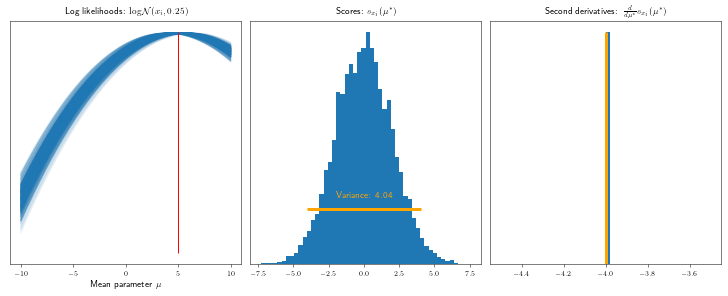

In [52]:
mean = torch.tensor([5.])
scale = 0.5
base = torch.distributions.Normal(mean, scale)
t = torch.distributions.AffineTransform(0,1)
p = torch.distributions.TransformedDistribution(base, t)

def generator(x):
    base = torch.distributions.Normal(t.inv(x), scale)
    q = torch.distributions.TransformedDistribution(base, t)
    return q

x = torch.linspace(-10,10, 400)
X = p.sample((10000, ))

means_diff = mean.repeat(10000,1).clone().requires_grad_(True)
scores = torch.autograd.grad(generator(means_diff).log_prob(X).sum(), means_diff, create_graph=True)[0]
hessian = torch.autograd.grad(scores.sum(), means_diff)[0]

import matplotlib.ticker as ticker
with plt.rc_context({**bundles.aistats2022(family="serif"), **axes.lines()}):
    
    fig, axs = plt.subplots(1,3, figsize=(10, 4))
    for x_i in X[:500]:
        base = torch.distributions.Normal(t.inv(x_i), 1.)
        q = torch.distributions.TransformedDistribution(base, t)
        axs[0].plot(x, q.log_prob(x).flatten(), color="C0", alpha=0.1)
    axs[0].vlines(5, -150, 0, color="red")
    axs[0].set_xlabel("Mean parameter $\mu$")
    axs[0].set_title(r"Log likelihoods: $\log \mathcal{N}(x_i, 0.25)$")
    axs[1].set_title(r"Scores: $s_{x_i}(\mu^*)$")
    axs[2].set_title(r"Second derivatives: $\frac{d}{d\mu^*}s_{x_i}(\mu^*)$")
    _ = axs[1].hist(scores.detach().numpy(), bins=50, density=True)
    _ = axs[1].hlines(0.05, -scores.var().detach(), scores.var().detach(), color="orange", linewidth=3.)
    axs[1].text(-2, 0.06, f"Variance: {float(scores.var().detach()):.2f}", color="orange", fontweight ="bold")
    axs[1].yaxis.set_major_locator(ticker.NullLocator())
    _ = axs[2].hist(hessian.detach().numpy(), bins=50, density=True)
    _ = axs[2].vlines(hessian.mean().detach(), 0, 50, color="orange", linewidth=3.)
    axs[2].yaxis.set_major_locator(ticker.NullLocator())
    axs[0].yaxis.set_major_locator(ticker.NullLocator())
    fig.savefig("../assets/normal_low_variance.png", dpi=200)

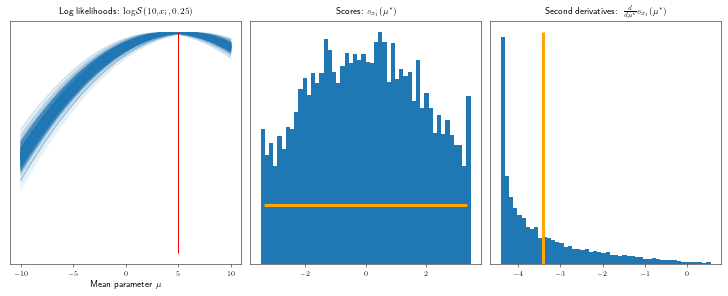

In [463]:
mean = torch.tensor([5.])
scale = 0.5
base = torch.distributions.StudentT(10.,mean, scale)
t = torch.distributions.AffineTransform(0,1)
p = torch.distributions.TransformedDistribution(base, t)

def generator(x):
    base = torch.distributions.StudentT(10.,t.inv(x), scale)
    q = torch.distributions.TransformedDistribution(base, t)
    return q

means_diff = mean.repeat(10000,1).clone().requires_grad_(True)
scores = torch.autograd.grad(generator(means_diff).log_prob(X).sum(), means_diff, create_graph=True)[0]
hessian = torch.autograd.grad(scores.sum(), means_diff)[0]

x = torch.linspace(-10,10, 400)
X = p.sample((10000, ))
import matplotlib.ticker as ticker
with plt.rc_context({**bundles.aistats2022(family="serif"), **axes.lines()}):
    
    fig, axs = plt.subplots(1,3, figsize=(10, 4))
    for x_i in X[:500]:
        base = torch.distributions.Normal(t.inv(x_i), 1.)
        q = torch.distributions.TransformedDistribution(base, t)
        axs[0].plot(x, q.log_prob(x).flatten(), color="C0", alpha=0.1)
    axs[0].vlines(5, -200, 0, color="red")
    axs[0].set_xlabel("Mean parameter $\mu$")
    axs[0].set_title(r"Log likelihoods: $\log \mathcal{S}(10,x_i, 0.25)$")
    axs[1].set_title(r"Scores: $s_{x_i}(\mu^*)$")
    axs[2].set_title(r"Second derivatives: $\frac{d}{d\mu^*}s_{x_i}(\mu^*)$")
    _ = axs[1].hist(scores.detach().numpy(), bins=50, density=True)
    _ = axs[1].hlines(0.05, -scores.var().detach(), scores.var().detach(), color="orange", linewidth=3.)
    axs[1].yaxis.set_major_locator(ticker.NullLocator())
    _ = axs[2].hist(hessian.detach().numpy(), bins=50, density=True)
    _ = axs[2].vlines(hessian.mean().detach(), 0, 2.2, color="orange", linewidth=3.)
    axs[2].yaxis.set_major_locator(ticker.NullLocator())
    axs[0].yaxis.set_major_locator(ticker.NullLocator())

Designing a Binomial experiment

In [77]:
import math

In [195]:
def fisher_info(p):
    return 1/(p*(1-p))
N = 1000
p_star = torch.distributions.Bernoulli(0.5)
F = fisher_info(0.5)
MLEs = []
for i in range(1,N):
    X = p_star.sample((100, i))
    MLE = X.mean(-1)
    variance = MLE.var()
    MLEs.append(MLE)


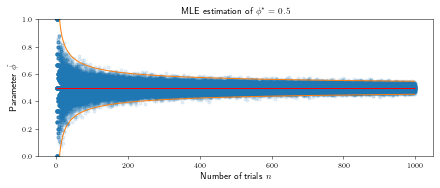

In [196]:
with plt.rc_context({**bundles.aistats2022(family="serif"), **axes.lines()}):
    fig = plt.figure(figsize=(6,2.5))
    for i in range(1,N-1):
        plt.plot(torch.ones(100)*i, MLEs[i], ".", color="C0", alpha=0.1)
    plt.hlines(0.5, 0, 1000, color="red")
    plt.plot([i for i in range(1,N-1)], [0.5-3/math.sqrt(F*i) for i in range(1,N-1)], color="C1")
    plt.plot([i for i in range(1,N-1)], [0.5+3/math.sqrt(F*i) for i in range(1,N-1)], color="C1")
    plt.ylim(0,1)
    plt.xlabel(r"Number of trials $n$")
    plt.ylabel(r"Parameter $\hat{\phi}$")
    plt.title(r"MLE estimation of $\phi^* = 0.5$")
    fig.savefig("../assets/bernoulli_confidence.png", dpi=300)

In [197]:
def fisher_info(p):
    return 1/(p*(1-p))
N = 1000
p_star = torch.distributions.Bernoulli(0.95)
F = fisher_info(0.95)
MLEs = []
for i in range(1,N):
    X = p_star.sample((100, i))
    MLE = X.mean(-1)
    variance = MLE.var()
    MLEs.append(MLE)


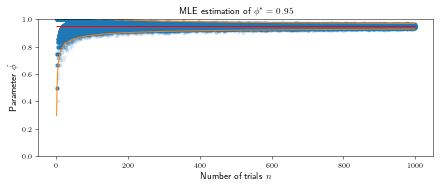

In [198]:
with plt.rc_context({**bundles.aistats2022(family="serif"), **axes.lines()}):
    fig = plt.figure(figsize=(6,2.5))
    for i in range(1,N-1):
        plt.plot(torch.ones(100)*i, MLEs[i], ".", color="C0", alpha=0.1)

    plt.hlines(0.95, 0, 1000, color="red")
    plt.plot([i for i in range(1,N-1)], [0.95-3/math.sqrt(F*i) for i in range(1,N-1)], color="C1")
    plt.plot([i for i in range(1,N-1)], [0.95+3/math.sqrt(F*i) for i in range(1,N-1)], color="C1")
    plt.ylim(0,1)
    plt.xlabel(r"Number of trials $n$")
    plt.ylabel(r"Parameter $\hat{\phi}$")
    plt.title(r"MLE estimation of $\phi^* = 0.95$")
    fig.savefig("../assets/bernoulli_confidence2.png", dpi=300)

In [4]:
def fisher_info(p):
    return 1/(p*(1-p))
N = 1000
p_star = torch.distributions.Bernoulli(0.5)
MLEs = []
error = []
for i in range(1,N):
    X = p_star.sample((1, i))
    MLE = X.mean(-1)
    F = fisher_info(MLE)
    error.append(3*torch.sqrt(1/(F*i)))
    MLEs.append(MLE)


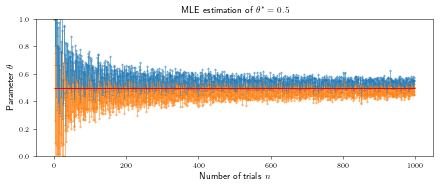

In [5]:
with plt.rc_context({**bundles.aistats2022(family="serif"), **axes.lines()}):
    fig = plt.figure(figsize=(6,2.5))
    for i in range(1,N-1):
        plt.errorbar(torch.ones(1)*i,  MLEs[i], yerr=error[i], color="C0",alpha=0.5, capsize=1., uplims=False, lolims=True, fmt="")
        plt.errorbar(torch.ones(1)*i,  MLEs[i], yerr=error[i], color="C1",alpha=0.5, capsize=1., uplims=True, lolims=False, fmt="")


    plt.hlines(0.5, 0, 1000, color="red")
    plt.ylim(0,1)
    plt.xlabel(r"Number of trials $n$")
    plt.ylabel(r"Parameter $\theta$")
    plt.title(r"MLE estimation of $\theta^* = 0.5$")
    fig.savefig("../assets/bernoulli_confidence_interval.png", dpi=300)

## Bayesian information matrix!

Prior for a Bernoulli is typically the Beta distribution

$$ p(\theta) = \frac{1}{B(\alpha, \beta)} \theta^{\alpha - 1} (1-\theta)^{\beta -1} $$

We have that 
$$ \nabla_\theta \log p(\theta) = \frac{(\alpha - 1)}{\theta} + \frac{(\beta - 1)}{(1-\theta)} = \frac{(\alpha - 1)(1-\theta) + (\beta - 1)\theta}{\theta (1-\theta)}  $$

Thus the Fisher information equals 

$$ F_\theta(\theta) = (\alpha - 1)\mathbb{E}\left[  \frac{1}{\theta^2} \right] + (\beta - 1)\mathbb{E}\left[  \frac{1}{(1-\theta)^2} \right]  + 2 (\alpha - 1)(\beta - 1)\mathbb{E}\left[  \frac{1}{\theta(1-\theta)} \right] $$

we have that
$$ \mathbb{E}\left[  \frac{1}{\theta^2} \right] = \frac{1}{B(\alpha, \beta)} \int  \frac{1}{\theta^2}  \theta^{\alpha - 1} (1-\theta)^{\beta -1}d\theta = \int \theta^{\alpha - 3} (1-\theta)^{\beta -1}d\theta = B(\alpha-2, \beta)$$
Similarly
$$ \mathbb{E}\left[  \frac{1}{(1-\theta)^2} \right] = B(\alpha, \beta-2) \qquad  \mathbb{E}\left[  \frac{1}{\theta(1-\theta)} \right] = B(\alpha -1, \beta -1)$$

We obtain 
$$ F_\theta(\theta) = (\alpha - 1) B(\alpha - 2, \beta) + (\beta -1) B(\alpha, \beta-2) + 2 (\alpha - 1)(\beta - 1)B(\alpha-1,\beta-1)$$

Notice that $B(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}$, thus

$$B(\alpha-2, \beta) = \frac{\Gamma(\alpha - 2) \Gamma(\beta)}{\Gamma(\alpha + \beta -2)} \quad B(\alpha, \beta-2) = \frac{\Gamma(\alpha) \Gamma(\beta-2)}{\Gamma(\alpha + \beta -2)} \quad B(\alpha-1, \beta-1) = \frac{\Gamma(\alpha - 1) \Gamma(\beta-1)}{\Gamma(\alpha + \beta -2)} $$

We thus can simplify 
$$F_\theta(\theta) = \frac{1}{\Gamma(\alpha + \beta -2)}(\alpha - 1) \Gamma(\alpha - 2)\Gamma(\beta) + (\beta -1)  \Gamma(\beta-2)\Gamma(\alpha) + 2 (\alpha - 1)(\beta - 1)\Gamma(\alpha-1)\Gamma(\beta-1)$$

$$= \frac{1}{\Gamma(\alpha + \beta -2)}(\alpha - 1) \Gamma(\alpha - 2)\Gamma(\beta) + (\beta -1)  \Gamma(\beta-2)\Gamma(\alpha) + 2 \Gamma(\alpha)\Gamma(\beta)$$

**NOTE** This only works for $\alpha, \beta > 2$...

c:\ProgramData\Miniconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


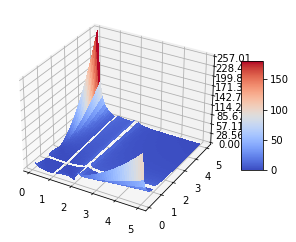

In [298]:
import torch 
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator

alphas = torch.linspace(0.1, 5, 50)
betas = torch.linspace(0.1,5, 50)

XX, YY = torch.meshgrid(alphas, betas)
pos = torch.hstack([XX.reshape(-1,1), YY.reshape(-1,1)])

a = pos[:,0]
b = pos[:,1]
Zinv = torch.exp(-torch.lgamma(pos.sum(-1)-2))
term1 = (a - 1)*torch.lgamma(a-2).exp()*torch.lgamma(b).exp()
term2 = (b-1)*torch.lgamma(a).exp()*torch.lgamma(b-1).exp()
term3 = 2*torch.lgamma(a).exp()*torch.lgamma(b).exp()
Z = (Zinv*(term1 + term2 + term3)).reshape(XX.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(0, 200)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


In [303]:
a = pos[:,0]
b = torch.ones(1)*2
Zinv = torch.exp(-torch.lgamma(pos.sum(-1)-2))
term1 = (a - 1)*torch.lgamma(a-2).exp()*torch.lgamma(b).exp()
term2 = (b-1)*torch.lgamma(a).exp()*torch.lgamma(b-1).exp()
term3 = 2*torch.lgamma(a).exp()*torch.lgamma(b).exp()
Z = (Zinv*(term1 + term2 + term3)).reshape(XX.shape)

In [304]:
Z

tensor([[7.3817e+00, 9.3612e+00, 1.0185e+01,  ..., 1.2878e+01, 1.1767e+01,
         1.0709e+01],
        [4.4640e+00, 4.8568e+00, 4.7485e+00,  ..., 5.6110e+00, 5.1065e+00,
         4.6296e+00],
        [3.1226e+00, 3.0530e+00, 2.7131e+00,  ..., 3.2831e+00, 2.9765e+00,
         2.6887e+00],
        ...,
        [3.2771e+01, 2.9942e+01, 2.7250e+01,  ..., 2.6322e-02, 2.1620e-02,
         1.7733e-02],
        [3.4564e+01, 3.1456e+01, 2.8519e+01,  ..., 2.4958e-02, 2.0471e-02,
         1.6768e-02],
        [3.6403e+01, 3.3004e+01, 2.9812e+01,  ..., 2.3690e-02, 1.9405e-02,
         1.5873e-02]])

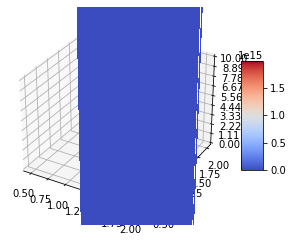

In [290]:
import torch 
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator

alphas = torch.linspace(0.5, 2, 50)
betas = torch.linspace(0.5,2, 50)

XX, YY = torch.meshgrid(alphas, betas)
pos = torch.hstack([XX.reshape(-1,1), YY.reshape(-1,1)])

a = pos[:,0]
b = pos[:,1]
beta = torch.distributions.Beta(a, b)
samples = beta.sample((1000,))
term1 = (a-1)/(samples)
term2 = (b-1)/(1-samples)
Z = torch.mean((term1 + term2)**2,0)
Z = Z.reshape(XX.shape)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


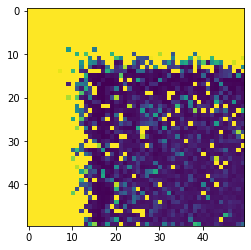

In [297]:
plt.imshow(Z, vmax=1000)